In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_production = pd.read_csv("Africa Food Production (2004 - 2013).csv")
df_supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")

In [3]:
df_production.head(40)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
5,Algeria,Wheat and products,2009,2953
6,Algeria,Wheat and products,2010,2605
7,Algeria,Wheat and products,2011,2555
8,Algeria,Wheat and products,2012,3432
9,Algeria,Wheat and products,2013,3299


In [4]:
df_supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
df_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [6]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [7]:
df_production["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [8]:
df_production["Year"].value_counts()

2004    2312
2005    2312
2006    2312
2007    2312
2008    2312
2009    2312
2010    2312
2011    2312
2012    2307
2013    2307
Name: Year, dtype: int64

In [9]:
df_production.shape

(23110, 4)

In [10]:
df_production.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [11]:
df_supply.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [12]:
df_supply.shape

(450, 3)

In [13]:
# Convert year in both production and supply datasets to datetime objects
df_production["Year"] = pd.to_datetime(df_production["Year"], format="%Y")
df_supply["Year"] = pd.to_datetime(df_supply["Year"], format="%Y")

In [14]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  23110 non-null  object        
 1   Item     23110 non-null  object        
 2   Year     23110 non-null  datetime64[ns]
 3   Value    23110 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 722.3+ KB


In [15]:
df_production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111


In [16]:
df_production["Item"].value_counts()

Milk - Excluding Butter         450
Vegetables, Other               450
Mutton & Goat Meat              450
Bovine Meat                     450
Offals, Edible                  450
                               ... 
Olive Oil                        40
Olives (including preserved)     40
Rape and Mustard Oil             40
Rye and products                 30
Cloves                           30
Name: Item, Length: 94, dtype: int64

In [17]:
# Clean column names
df_production.columns = df_production.columns.str.lower()

In [18]:
df_supply.columns = df_supply.columns.str.lower()

In [19]:
df_production.columns

Index(['country', 'item', 'year', 'value'], dtype='object')

In [20]:
df_supply.columns

Index(['country', 'year', 'value'], dtype='object')

In [21]:
df_production.describe()

,value
count,23110.000000
mean,327.785201
std,1607.940343
min,0.000000
25%,3.000000
50%,18.000000
75%,108.000000
max,54000.000000


In [22]:
df_supply.describe()

,value
count,450.000000
mean,2469.775556
std,379.140143
min,1781.000000
25%,2174.000000
50%,2376.000000
75%,2681.750000
max,3561.000000


<AxesSubplot:>

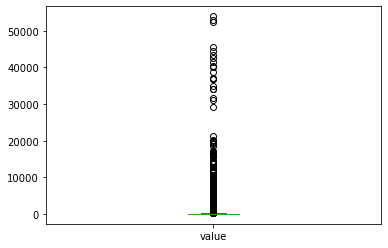

In [23]:
df_production.plot(kind="box")

<AxesSubplot:>

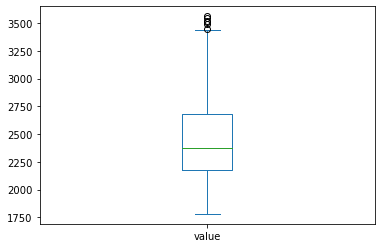

In [24]:
df_supply.plot(kind="box")

In [25]:
df_production.groupby(["country", "year", "item"])[["country", "year", "item", "value"]].sum()

value
country  year       item                        
Algeria  2004-01-01 Apples and products      165
                    Bananas                    0
                    Barley and products     1212
                    Beans                      2
                    Beer                     110
...                                          ...
Zimbabwe 2013-01-01 Tea (including mate)      19
                    Tomatoes and products     24
                    Vegetables, Other        203
                    Wheat and products        25
                    Wine                       2

[23110 rows x 1 columns]

In [26]:
# the most produced meals in each year
df_2004 = df_production[df_production["year"] == "2004"]
df_2004.head()

,country,item,year,value
0,Algeria,Wheat and products,2004-01-01,2731
10,Algeria,Rice (Milled Equivalent),2004-01-01,0
20,Algeria,Barley and products,2004-01-01,1212
30,Algeria,Maize and products,2004-01-01,1
40,Algeria,Oats,2004-01-01,89


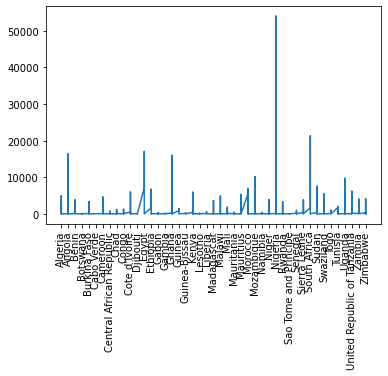

In [27]:
plt.plot(df_production["country"], df_production["value"])
plt.xticks(rotation="vertical");

In [28]:
def plot_year(year):
    df_year = df_production[df_production["year"] == year]
    plt.plot(df_year["country"], df_year["value"])
    plt.xlabel("Country")
    plt.ylabel("Values in Kilotonnes")
    plt.title(f"Total Production in Kilotonnes by country in {year}")
    plt.xticks(rotation="vertical")

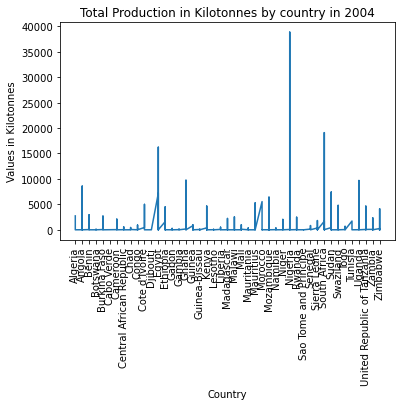

In [29]:
plot_year("2004")

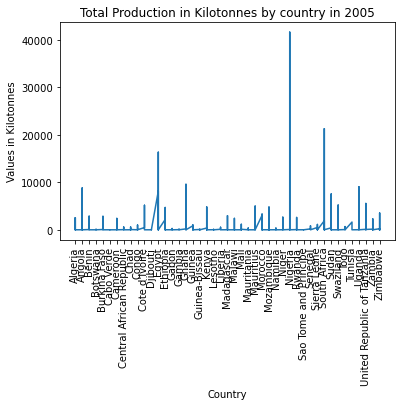

In [30]:
plot_year("2005")

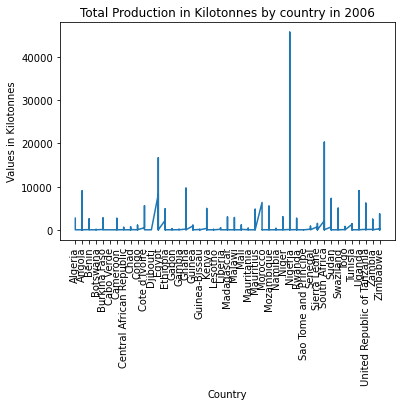

In [31]:
plot_year("2006")

In [32]:
df_2005 = df_production[df_production["year"] == "2005"]
df_2005.head()

,country,item,year,value
1,Algeria,Wheat and products,2005-01-01,2415
11,Algeria,Rice (Milled Equivalent),2005-01-01,0
21,Algeria,Barley and products,2005-01-01,1033
31,Algeria,Maize and products,2005-01-01,1
41,Algeria,Oats,2005-01-01,78


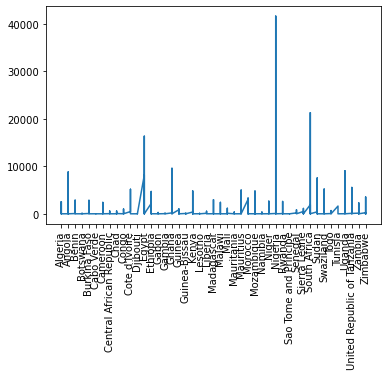

In [33]:
plt.plot(df_2005["country"], df_2005["value"])
plt.xticks(rotation="vertical")
plt.show();

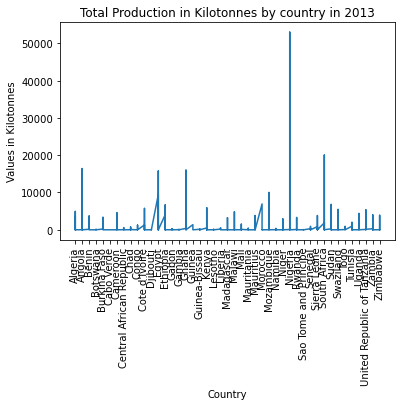

In [34]:
plot_year("2013")

In [37]:
df_bet = df_supply[df_supply["year"].between("2004", "2006")]

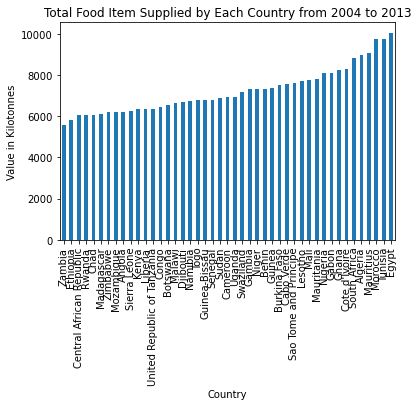

In [81]:
(
    df_bet.groupby("country")["value"]
    .sum()
    .sort_values()
    .plot(kind="bar")
)
plt.xlabel("Country")
plt.ylabel("Value in Kilotonnes")
plt.title("Total Food Item Supplied by Each Country from 2004 to 2013");

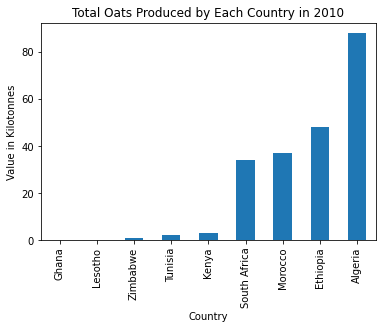

In [89]:
(
    df_production[(df_production["item"]=="Oats") & (df_production["year"] == "2010")]
    .groupby("country")["value"]
    .sum()
    .sort_values()
    .plot(kind="bar")
)
plt.xlabel("Country")
plt.ylabel("Value in Kilotonnes")
plt.title("Total Oats Produced by Each Country in 2010");

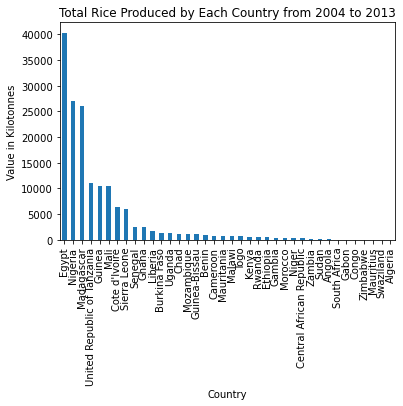

In [79]:
(
    df_production[df_production["item"]
    .str.contains("Rice")]
    .groupby("country")["value"]
    .sum().sort_values(ascending=False)
    .plot(kind="bar")
)
plt.xlabel("Country")
plt.ylabel("Value in Kilotonnes")
plt.title("Total Rice Produced by Each Country from 2004 to 2013");


<AxesSubplot:xlabel='item'>

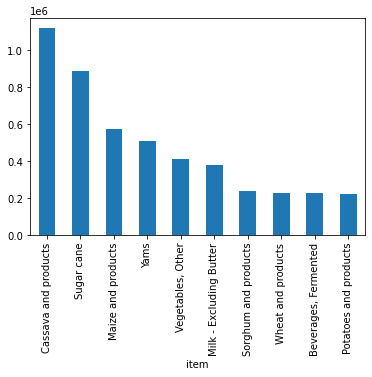

In [86]:
df_production.groupby("item")["value"].sum().sort_values(ascending=False).head(10).plot(kind="bar")

In [62]:
df_production[df_production["item"].str.contains("Rice")]

,country,item,year,value
10,Algeria,Rice (Milled Equivalent),2004-01-01,0
11,Algeria,Rice (Milled Equivalent),2005-01-01,0
12,Algeria,Rice (Milled Equivalent),2006-01-01,0
13,Algeria,Rice (Milled Equivalent),2007-01-01,0
14,Algeria,Rice (Milled Equivalent),2008-01-01,0
...,...,...,...,...
22485,Zimbabwe,Rice (Milled Equivalent),2009-01-01,0
22486,Zimbabwe,Rice (Milled Equivalent),2010-01-01,0
22487,Zimbabwe,Rice (Milled Equivalent),2011-01-01,0
22488,Zimbabwe,Rice (Milled Equivalent),2012-01-01,0


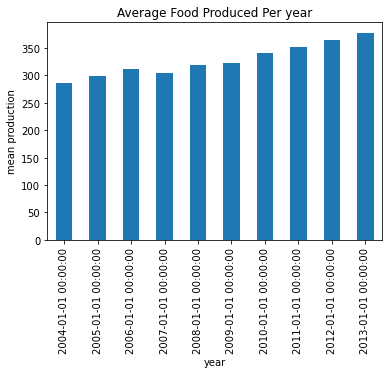

In [87]:
# Average food produced per year
df_production.groupby("year")["value"].mean().plot(kind="bar")
plt.xlabel("year")
plt.ylabel("mean production")
plt.title("Average Food Produced Per year");

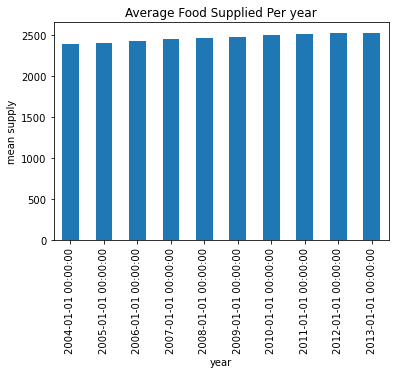

In [88]:
# Average food supplied per year
df_supply.groupby("year")["value"].mean().plot(kind="bar")
plt.xlabel("year")
plt.ylabel("mean supply")
plt.title("Average Food Supplied Per year");